# Влияние подписки на сервис по прокату самокатов

**Цель исследования**

Проверить как наличие платной подписки влияет на длительность, расстояние поездки, а также на сумму выручки.

**Входные данные**

**Пользователи** — *`users_go.csv`*
- `user_id` - уникальный идентификатор пользователя
- `name` - имя пользователя
- `age` - возраст
- `city` - город
- `subscription_type` - тип подписки (free, ultra)

**Поездки** — *`rides_go.csv`*
- `user_id` - уникальный идентификатор пользователя
- `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` - дата совершения поездки

**Подписки** — *`subscriptions_go.csv`*
- `subscription_type` - тип подписки
- `minute_price` - стоимость одной минуты поездки по данной подписке
- `start_ride_price` - стоимость начала поездки
- `subscription_fee` - стоимость ежемесячного платежа

**Ход исследования**
*    Загрузка данных;
*    Предобработка данных;
*    Исследовательский анализ данных;
*    Объединение данных;
*    Подсчёт выручки;
*    Проверка гипотез.

In [1]:
# подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Загрузка данных

In [2]:
# подгружаем данные таблицы пользователей
df_users = pd.read_csv('/users_go.csv', sep=',', decimal='.', engine='python')

display(df_users.sample(10))
display(df_users.describe())
display(df_users.info())

,user_id,name,age,city,subscription_type
1394,1395,Артём,30,Сочи,free
1457,1458,Тамерлан,24,Сочи,free
1465,1466,Григорий,24,Ростов-на-Дону,free
666,667,Арина,23,Ростов-на-Дону,ultra
1328,1329,Самир,35,Сочи,free
1373,1374,Марк,29,Пятигорск,free
1243,1244,Ксения,23,Екатеринбург,free
1311,1312,Регина,21,Краснодар,free
204,205,Тимофей,26,Пятигорск,ultra
727,728,Вячеслав,12,Пятигорск,free


,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

In [3]:
# подгружаем данные таблицы поездок пользователей
df_rides = pd.read_csv('/rides_go.csv', sep=',', decimal='.', engine='python')

display(df_rides.sample(10))
display(df_rides.describe())
display(df_rides.info())

,user_id,distance,duration,date
6826,722,669.905310,13.512145,2021-10-04
3588,386,3501.187897,22.003394,2021-05-01
17691,1509,2418.905819,13.537315,2021-06-12
8854,876,4682.311311,25.558667,2021-05-13
6630,709,2273.921770,21.527207,2021-02-10
131,13,4676.575006,21.706300,2021-10-24
14296,1264,2456.748494,10.758153,2021-10-18
12216,1117,2570.110203,17.425276,2021-12-03
11031,1030,2229.900375,6.459801,2021-09-02
13895,1237,2726.739989,21.906960,2021-09-26


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

In [4]:
# подгружаем данные по подпискам
df_subs = pd.read_csv('/subscriptions_go.csv', sep=',', decimal='.', engine='python')

display(df_subs)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод**

После загрузки файлов получили информацию:
- о видах подписки - есть 2 подписки, бесплатная и Ультра, а также их параметры.
- информацию о пользователях сервиса: нужно дополнительно проверить на дубликаты, т.к. количество ID пользователей в таблице меньше общего числа строк. Также проверить нет ли неявных дубликатов в названии городов.
- информацию о поездках: поменяем тип данных в дате поездки для удобства дальнейшего исследования.

## Предобработка данных

### Поменяем тип данных в столбце даты с *object* на *datetime*.
Также добавим столбец с месяцами по дате совершения поездки.

In [5]:
# меняем тип данных в столбце с датой совершения поездки
df_rides['date'] = pd.to_datetime(df_rides['date'], format='%Y.%m.%d')

# добавляем столбец с номером месяца, когда была совершена поездка
df_rides['month'] = df_rides['date'].dt.month

print(f'Начальная дата выборки:', {df_rides['date'].min()})
print(f'Конечная дата выборки:', {df_rides['date'].max()})
print(f'Временной промежуток выборки:', {df_rides['date'].max() - df_rides['date'].min()})

Начальная дата выборки: {Timestamp('2021-01-01 00:00:00')}
Конечная дата выборки: {Timestamp('2021-12-30 00:00:00')}
Временной промежуток выборки: {Timedelta('363 days 00:00:00')}


### Проверим таблицу с информацией о пользователях на наличие дубликатов.

In [6]:
# найдём количество дубликатов среди пользователей
df_users.duplicated().sum()

31

Нашли 31 дубликат, что предварительно было видно по разнице в ID и общему числу строк набора данных - удалим дубликаты.

In [7]:
# удаляем дубликаты и сбрасываем индексы
df_users = df_users.drop_duplicates().reset_index(drop=True)
df_users.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


Проверим на уникальность названия городов, чтобы в дальнейшем не возникли ошибки при исследовании.

In [8]:
# выведем список уникальных значений в столбце с названиями городов
df_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявных дубликатов в таблице нет.

**Вывод**

- Проверили дубликаты в списке пользователей - нашли 31 задвоенную строку и удалили их.
- Проверили на наличие неявных дубликатов в названиях городов - таких не нашлось.
- Поменяли тип данных в столбце с датой и добавили столбец с номером месяца, когда совершена поездка.

Данные готовы для исследовательского анализа.

## Исследовательский анализ данных

Напишем функции для визуализации данных.

In [9]:
# для дискретных данных
def build_plot(data, title, xlabel, ylabel, rotation=90):
    plt.figure(figsize=(10,3))
    plt.ticklabel_format(style='plain')
    ax = data.plot.bar()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()

# для непрерывных данных
def build_hist(data, title, xlabel, ylabel):
    plt.figure(figsize=(10,3))
    data.hist(bins=50)
    plt.ticklabel_format(style='plain')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

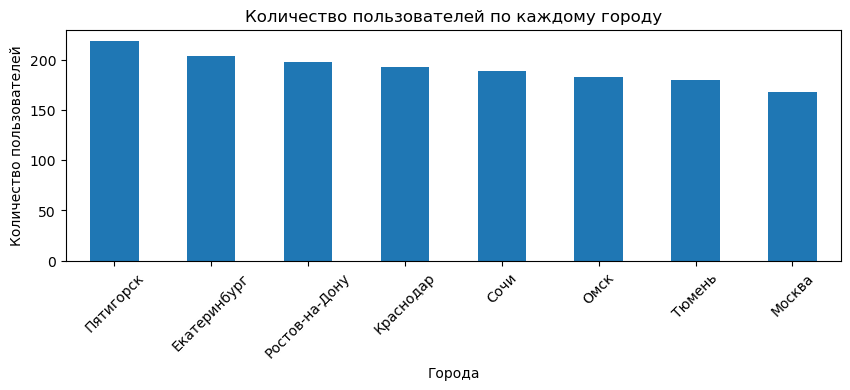

In [10]:
# выведем количество пользователей в отдельно взятом городе
build_plot(
    df_users['city'].value_counts(), 'Количество пользователей по каждому городу', 'Города', 'Количество пользователей', 45
)

Самое большое количество поездок в наборе данных - Пятигорск, самое меньшее - по Москве.

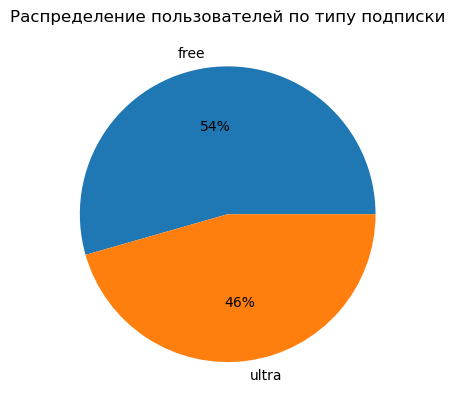

In [11]:
# выведем количество пользователей с разным типом подписки
fig1, ax1 = plt.subplots()
plt.title('Распределение пользователей по типу подписки')
subs_type = df_users.value_counts('subscription_type').reset_index()
subs_type.columns = ['type','count']
ax1.pie(subs_type['count'], labels=subs_type['type'], autopct='%.0f%%')
plt.show()

Без подписки ездит большее число пользователей, но разрыв не такой большой.

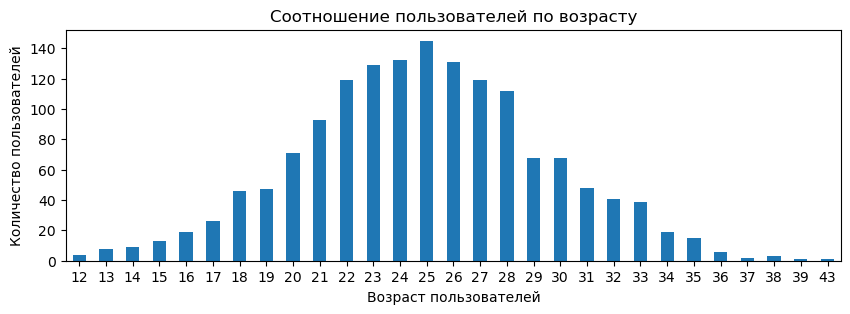

In [12]:
# выведем соотношение пользователей по возрасту
build_plot(df_users['age'].value_counts().sort_index(), 
           'Соотношение пользователей по возрасту', 'Возраст пользователей', 'Количество пользователей', 0)

Большинство пользователей сервиса находятся в возрастном диапазоне от 20 до 30 лет.

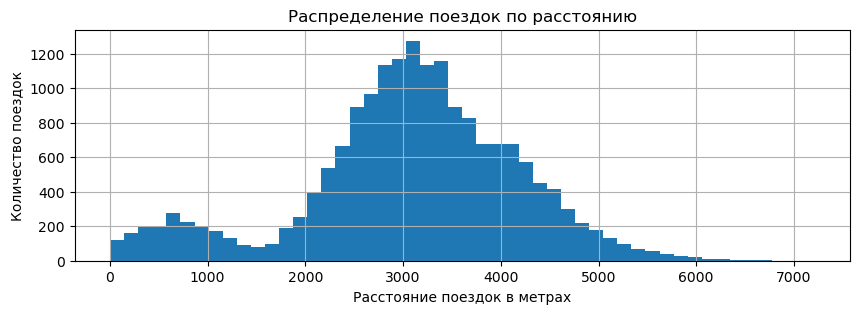

In [13]:
# выведем расстрояние, которое пользователь преодолел за одну поездку
build_hist(df_rides.distance, 'Распределение поездок по расстоянию', 'Расстояние поездок в метрах', 'Количество поездок')

Большинство поездок были на расстояние от 2 до 5 км.\
Также есть небольшой пик до 1000 метров, скорее всего, это тестовые заезды новых пользователей.

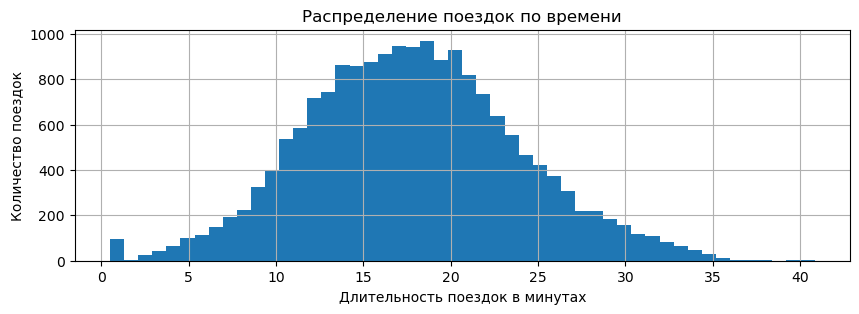

In [14]:
# выведем информацию о длительности поездок
build_hist(df_rides.duration, 'Распределение поездок по времени', 'Длительность поездок в минутах', 'Количество поездок')

Основная масса поездок по длительности имеет нормальное распределение. Также есть небольшой "выступ" около 1 минуты - скорее всего часть пользователей опробовала сервис.

**Вывод**

Посмотрели "типичного пользователя" сервиса, а также какие обычно поездки совершают.

## Объединение данных

In [15]:
# объединяем таблицу пользователей и поездок
df_temp = df_users.merge(df_rides, on='user_id', how='left')

# добавляем к ним также таблицу с параметрами подписок
df_full = df_temp.merge(df_subs, on='subscription_type', how='left')

# проверим количество строк и столбцов до и после объединения таблиц
print(f'Количество строк в таблице до объединения: {df_rides.shape[0]}')
print(f'Количество строк в таблице после объединения: {df_full.shape[0]}')
print(f'Количество столбцов в таблице до объединения: {df_rides.shape[1] + df_users.shape[1] + df_subs.shape[1] - 2}')
print(f'Количество столбцов в таблице после объединения: {df_full.shape[1]}')

Количество строк в таблице до объединения: 18068
Количество строк в таблице после объединения: 18068
Количество столбцов в таблице до объединения: 12
Количество столбцов в таблице после объединения: 12


In [16]:
# создадим отдельный набор данных с бесплатной подпиской
df_free = df_full.loc[df_full['subscription_type'] == 'free']

# также создадим набор данных с платной подпиской
df_ultra = df_full.loc[df_full['subscription_type'] == 'ultra']

Теперь посмотрим графики по расстоянию и длительности поездок для разных подписок

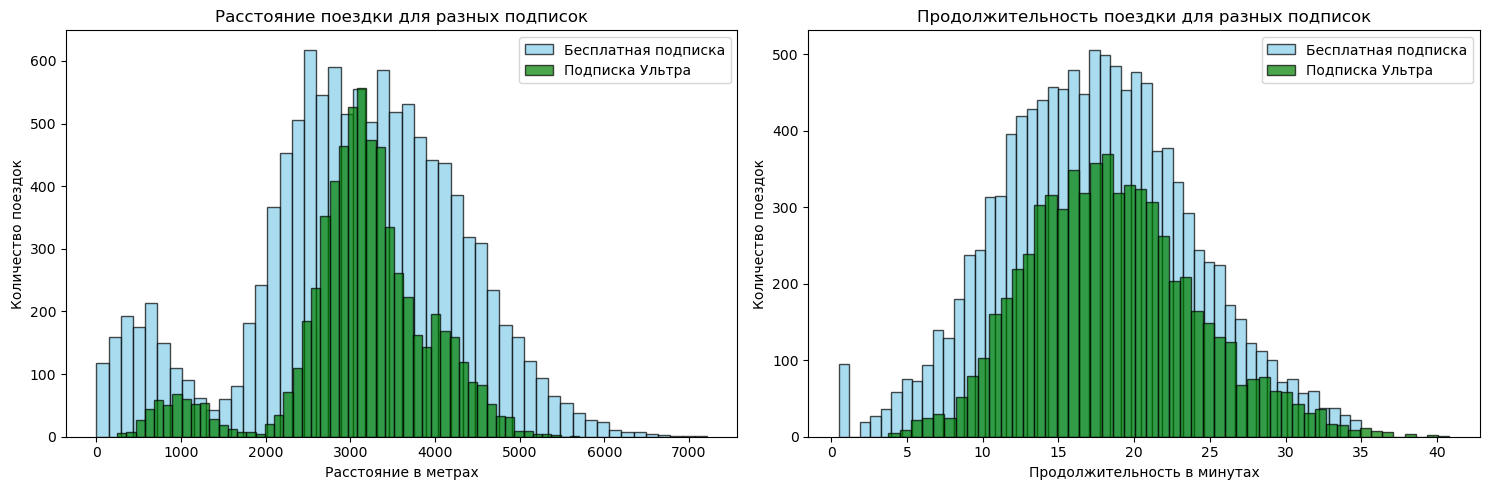

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# график расстояний с разными подписками
axs[0].hist(df_free['distance'], bins=50, color='skyblue', edgecolor='black', alpha=0.7, label='Бесплатная подписка')
axs[0].hist(df_ultra['distance'], bins=50, color='green', edgecolor='black', alpha=0.7, label='Подписка Ультра')
axs[0].set_title('Расстояние поездки для разных подписок')
axs[0].set_xlabel('Расстояние в метрах')
axs[0].set_ylabel('Количество поездок')
axs[0].legend()

# график продолжительности поездки с разными подписками
axs[1].hist(df_free['duration'], bins=50, color='skyblue', edgecolor='black', alpha=0.7, label='Бесплатная подписка')
axs[1].hist(df_ultra['duration'], bins=50, color='green', edgecolor='black', alpha=0.7, label='Подписка Ультра')
axs[1].set_title('Продолжительность поездки для разных подписок')
axs[1].set_xlabel('Продолжительность в минутах')
axs[1].set_ylabel('Количество поездок')
axs[1].legend()

plt.tight_layout()
plt.show()

**Вывод**

Пользователи с бесплатной подпиской ездят более быстро или с меньшим количеством остановок, т.к. при меньшем времени поездки преодолевают часто большие расстояния.\
"Выступ", который был обнаружен в предыдущем этапе подтвердился - пользователи с бесплатной подпиской пробовали сервис и заканчивали поездку до начала второй минуты. А обладатели платной подписки редко заканчивают поездку раньше 5 минут.

## Подсчёт выручки

Создаём таблицу со строками по каждому пользователю за каждый отдельный месяц с информацией суммарного расстояния, продолжительности поездок и количества совершённых поездок.\
Перед созданием таблицы с аггрегированными данными добавим столбец с округлённой длительностью поездок до большего числа. Так в дальнейшем сможем верно рассчитать какую сумму заплатил каждый пользователь.

In [18]:
# добавляем столбец с округлённой длительностью поездки
df_full['duration_round'] = np.ceil(df_full['duration'])

# создаём таблицу с суммарными данными помесячно по каждому пользователю
df_grouped = df_full.groupby(['user_id', 'month', 'start_ride_price', 
                              'minute_price', 'subscription_fee', 'subscription_type'])\
                    .agg({'distance': 'sum',
                          'duration_round': 'sum',
                          'age':'count'})\
                    .reset_index()
# переименуем столбцы
df_grouped.columns = ['user_id','month','start_ride_price','minute_price',
                      'subscription_fee','subscription_type','distance','duration','rides_count']

df_grouped

,user_id,month,start_ride_price,minute_price,subscription_fee,subscription_type,distance,duration,rides_count
0,1,1,0,6,199,ultra,7027.511294,42.0,2
1,1,4,0,6,199,ultra,754.159807,7.0,1
2,1,8,0,6,199,ultra,6723.470560,46.0,2
3,1,10,0,6,199,ultra,5809.911100,32.0,2
4,1,11,0,6,199,ultra,7003.499363,56.0,3
...,...,...,...,...,...,...,...,...,...
11326,1534,6,50,8,0,free,3409.468534,26.0,2
11327,1534,8,50,8,0,free,7622.453034,48.0,2
11328,1534,9,50,8,0,free,4928.173852,23.0,1
11329,1534,11,50,8,0,free,13350.015305,78.0,4


Теперь рассчитаем и добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

In [19]:
# создадим формулу для расчёта выручки с каждого пользователя помесячно
def income(row):
    return ((row['start_ride_price'] * row['rides_count']) 
            + (row['minute_price'] * row['duration']) + row['subscription_fee']) 

In [20]:
# добавим столбец с выручкой
df_grouped['income'] = df_grouped.apply(income, axis=1)

df_grouped

,user_id,month,start_ride_price,minute_price,subscription_fee,subscription_type,distance,duration,rides_count,income
0,1,1,0,6,199,ultra,7027.511294,42.0,2,451.0
1,1,4,0,6,199,ultra,754.159807,7.0,1,241.0
2,1,8,0,6,199,ultra,6723.470560,46.0,2,475.0
3,1,10,0,6,199,ultra,5809.911100,32.0,2,391.0
4,1,11,0,6,199,ultra,7003.499363,56.0,3,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,50,8,0,free,3409.468534,26.0,2,308.0
11327,1534,8,50,8,0,free,7622.453034,48.0,2,484.0
11328,1534,9,50,8,0,free,4928.173852,23.0,1,234.0
11329,1534,11,50,8,0,free,13350.015305,78.0,4,824.0


**Вывод**

Рассчитали выручку каждого отдельного пользователя за отдельные месяцы и создали отдельную таблицу с необходимыми данными для проверки гипотез.

## Проверка гипотез

### Проверим гипотезу - тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

$\begin{equation*}
 \begin{cases}
   H_0 :\text{пользователи с платной подпиской не оказывают влияние на длительность поездок}\\
   H_1 :\text{обладатели платной подписки тратят больше времени на поездки}
 \end{cases}
\end{equation*}$

In [21]:
duration_ultra = df_full[df_full['subscription_type'] == 'ultra']['duration']
duration_free = df_full[df_full['subscription_type'] == 'free']['duration']

print(f"Средняя длительность поездки с платной подпиской: {duration_ultra.mean():.1f} минут")
print(f"Средняя длительность поездки без подписки: {duration_free.mean():.1f} минут")

alpha = 0.05
results = st.ttest_ind(duration_ultra, duration_free, alternative='greater')
print(f'p-value: {results.pvalue}')
 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу - с подпиской поездки продолжительнее')
else:
    print('Нет оснований отвергнуть нулевую гипотезу - поездки не стали продолжительнее')

Средняя длительность поездки с платной подпиской: 18.5 минут
Средняя длительность поездки без подписки: 17.4 минут
p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу - с подпиской поездки продолжительнее


Пользователи с подпиской совершают более длительные по времени поездки - альтернативная гипотеза подтвердилась.

### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Проверим гипотезу, можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

$\begin{equation*}
 \begin{cases}
   H_0 :\text{обладатели платной подписки совершают поездки не превышающие 3130 метров}\\
   H_1 :\text{обладатели платной подписки совершают поездки длиннее, чем 3130 метров}
 \end{cases}
\end{equation*}$

In [22]:
distance_ultra = df_full[df_full['subscription_type'] == 'ultra']['distance']
distance_goal = 3130

alpha = 0.05

results = st.ttest_1samp(
    distance_ultra, 
    distance_goal,
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу - поездки длиннее 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу - поездки не превышают 3130 метров')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу - поездки не превышают 3130 метров


Подтвердилась гипотеза, что пользователи с подпиской не совершают более длинные поездки, чем предполагалось.
Дополнительных расходов в виде технического обслуживания самокатов обладатели платных подписок не несут.

### Проверим гипотезу о том, будет ли выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

$\begin{equation*}
 \begin{cases}
   H_0 :\text{помесячная выручка с платной подпиской равна выручке от пользователей без подписки}\\
   H_1 :\text{помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки}
 \end{cases}
\end{equation*}$

In [23]:
income_ultra = df_grouped[df_grouped['subscription_type'] == 'ultra']['income']
income_free = df_grouped[df_grouped['subscription_type'] == 'free']['income']

print(f"Средняя помесячная выручка с обладателя платной подписки: {income_ultra.mean():.1f} рублей")
print(f"Средняя помесячная выручка пользователя без подписки: {income_free.mean():.1f} рублей")

alpha = 0.05
results = st.ttest_ind(income_ultra, income_free, alternative='greater')
print(f'p-value: {results.pvalue}')
 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу - помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки')
else:
    print('Нет оснований отвергнуть нулевую гипотезу - помесячная выручка с платной подпиской не изменилась по сравнению с выручкой от пользователей без подписки')

Средняя помесячная выручка с обладателя платной подписки: 362.8 рублей
Средняя помесячная выручка пользователя без подписки: 328.6 рублей
p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу - помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки


Альтернативная гипотеза подтвердилась - помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

### Вывод

По тестам поняли, что пользователи с подпиской начинают дольше по времени ездить и приносят больше помесячной выручки.\
При этом они не начнут совершать длинных поездок, которые могли бы привести к дополнительным расходам на обслуживание самокатов.

## Общий вывод

В ходе исследования нам была предоставлена выборка данных о поездках с помощью сервиса GoFast за 2021 год по 8 городам.\
У сервиса есть 2 подписки: бесплатная и тариф Ultra.

В рамках предобработки данных исключили дубликаты пользователей, поменяли типы данных.

Провели исследовательский анализ, где ознакомились с данными по поездкам:
- Пик пользователей по возрасту - 25 лет. Чем моложе или старше люди от этого значения, тем показатель ниже.
- Обладателей платной подписки - 46%, пользователей без подписки - 54%.
- Средняя длительность поездки по времени - от 15 до 20 минут.
- Средняя дальность поездки - около 3000 метров.

Объединили данные из нескольких таблиц, чтобы получить более целую картину по пользователям и их поездкам.\
При визуальном сравнении длительности и дальности поездок по виду подписки заметили, что пользователи без подписки совершали поездки менее одной минуты - делали тестовые заезды. Обладатели платной подписки всегда совершают более продолжительные поездки.

Рассчитали ежемесячную выручку по каждому пользователю, а также подсчитали количество поездок, суммарную длительность и дальность поездок для каждого пользователя помесячно.

Провели статистический анализ данных, где выяснили, что пользователи с подпиской начинают дольше по времени ездить и приносят больше помесячной выручки.\
При этом они не начнут совершать длинных поездок, которые могли бы привести к дополнительным расходам на обслуживание самокатов.
Следовательно, обладатели платной подписки выгоднее для компании, чем пользователи без подписки.